Sicily Airbnb Investment Analysis

Author: Monika Kwiatkowska
Date: February 2026
Objective: identify optimal investment opportunities in Sicily

What's needed to use this notebook

Python 3.8+, pandas, numpy, matplotlib, seaborn

Setup: upload data to Google Drive `/Sicily_Airbnb_Project/data/`, mount Google Drive and rull all cells.

Data Source: http://insideairbnb.com/get-the-data.html

Exploratory data analysis

In [92]:
#importing libraries and reading the file (from google drive)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

listings = pd.read_csv ('/content/drive/MyDrive/Portfolio Projects/listing.gz')

In [93]:
#converting to df and checking first 5 rows

df = pd.DataFrame (listings)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7011,https://www.airbnb.com/rooms/7011,20250929042425,2025-09-29,city scrape,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16888,...,4.72,4.59,4.59,IT081011A1HJT5H6NW,t,10,10,0,0,0.16
1,22948,https://www.airbnb.com/rooms/22948,20250929042425,2025-09-30,city scrape,BnB Room with Balcony near Valley of the Temples,Near the Central Station and the beginning of ...,"The neighborhood is in a residential area, cen...",https://a0.muscache.com/pictures/hosting/Hosti...,88837,...,4.83,4.90,4.86,IT084001C1KUVGVHF9,t,3,0,3,0,2.67
2,35264,https://www.airbnb.com/rooms/35264,20250929042425,2025-09-29,city scrape,Etna-sea a panoramic villa,"Our country house, swathed in the greenery of ...","Contact with nature, relaxation, remarkable pa...",https://a0.muscache.com/pictures/7dc73c6a-7bee...,151644,...,4.82,4.85,4.77,IT087035B5VYN4LFLN,f,5,5,0,0,0.89
3,43992,https://www.airbnb.com/rooms/43992,20250929042425,2025-09-30,city scrape,Two steps from the sea,Very nice flat in front of the beach with a wo...,NaN,https://a0.muscache.com/pictures/9495798/e9cfb...,192525,...,4.95,4.56,4.66,IT081008C26PNHNIA6,f,2,2,0,0,0.53
4,43995,https://www.airbnb.com/rooms/43995,20250929042425,2025-09-30,city scrape,Villa Verdemare,Wonderful villa that can easily accommodate up...,NaN,https://a0.muscache.com/pictures/9498289/eef27...,192525,...,4.93,4.72,4.72,IT081020C2NSGROBUN,f,2,2,0,0,0.46


In [94]:
#data types and info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            57531 non-null  int64  
 1   listing_url                                   57531 non-null  object 
 2   scrape_id                                     57531 non-null  int64  
 3   last_scraped                                  57531 non-null  object 
 4   source                                        57531 non-null  object 
 5   name                                          57531 non-null  object 
 6   description                                   55811 non-null  object 
 7   neighborhood_overview                         23086 non-null  object 
 8   picture_url                                   57531 non-null  object 
 9   host_id                                       57531 non-null 

In [95]:
#names of the columns

df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [96]:
#searching for missing values

df.isnull().any()

,0
id,False
listing_url,False
scrape_id,False
last_scraped,False
source,False
...,...
calculated_host_listings_count,False
calculated_host_listings_count_entire_homes,False
calculated_host_listings_count_private_rooms,False
calculated_host_listings_count_shared_rooms,False


In [97]:
#statistics

df.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.753100e+04,5.753100e+04,5.753100e+04,57473.000000,57473.000000,0.0,57531.000000,57531.000000,57531.000000,51860.000000,...,41589.000000,41583.000000,41584.000000,41584.000000,41582.000000,57531.000000,57531.000000,57531.000000,57531.000000,41591.000000
mean,6.575658e+17,2.025093e+13,2.786940e+08,47.302733,81.751744,NaN,37.640145,14.138333,4.358259,1.416014,...,4.782011,4.833510,4.839677,4.711867,4.679183,12.808625,11.136413,1.632250,0.016721,0.787285
std,5.859217e+17,6.511775e+00,2.321915e+08,184.288770,334.360216,NaN,0.538620,1.024592,2.318357,1.013893,...,0.397011,0.359178,0.372714,0.410044,0.456595,37.588231,34.747716,4.823123,0.402882,1.058523
min,7.011000e+03,2.025093e+13,1.688800e+04,1.000000,1.000000,NaN,35.494560,11.928847,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.362695e+07,2.025093e+13,5.010769e+07,1.000000,1.000000,NaN,37.238505,13.327149,3.000000,1.000000,...,4.730000,4.820000,4.840000,4.600000,4.580000,1.000000,1.000000,0.000000,0.000000,0.130000
50%,7.904431e+17,2.025093e+13,2.123032e+08,3.000000,3.000000,NaN,37.802940,14.515280,4.000000,1.000000,...,4.920000,4.950000,4.980000,4.830000,4.800000,2.000000,2.000000,0.000000,0.000000,0.400000
75%,1.196481e+18,2.025093e+13,4.965379e+08,6.000000,7.000000,NaN,38.105191,15.097030,5.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,0.000000,1.000000
max,1.519680e+18,2.025093e+13,7.209809e+08,2745.000000,8775.000000,NaN,38.810240,15.651680,16.000000,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,291.000000,277.000000,50.000000,19.000000,12.830000


In [98]:
# count of properties in neighbourhoods
df['neighbourhood_cleansed'].nunique()

# top 5 count
df['neighbourhood_cleansed'].value_counts().head()

,count
neighbourhood_cleansed,
Palermo,7935
Catania,4662
Siracusa,3865
Noto,1833
Castellammare del Golfo,1710


In [99]:
#property types

df['property_type'].value_counts()

,count
property_type,
Entire rental unit,18722
Entire home,10934
Entire condo,4741
Private room in bed and breakfast,4724
Entire villa,4676
...,...
Private room in island,1
Private room in barn,1
Shared room in hotel,1


In [100]:
#room type

df['room_type'].value_counts()

,count
room_type,
Entire home/apt,45943
Private room,11261
Hotel room,259
Shared room,68


In [101]:
#example of 10 pricings per unit per night

df['price'].head(10)

,price
0,$219.00
1,$45.00
2,$109.00
3,$68.00
4,$75.00
5,$137.00
6,$41.00
7,$43.00
8,$102.00
9,$300.00


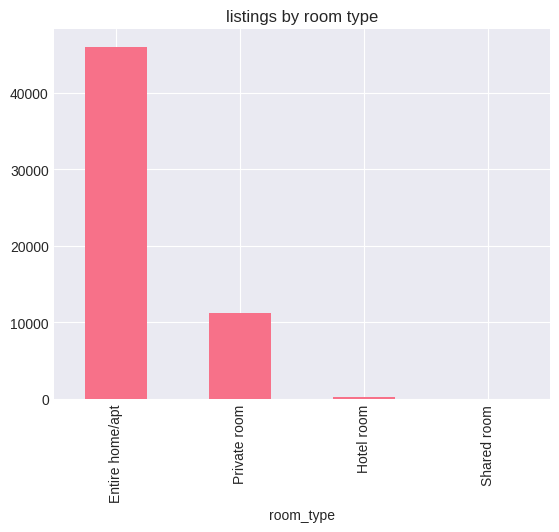

In [102]:
#barplot for unit type

df['room_type'].value_counts().plot(kind='bar')
plt.title('listings by room type')
plt.show()

In [103]:
#summary of EDA

print("Total listings:", len(df))
print("Total columns:", len(df.columns))
print("")
print("Neighborhoods:", df['neighbourhood_cleansed'].nunique())
print("Property types:", df['property_type'].nunique())
print("")
print("Most common neighborhood:", df['neighbourhood_cleansed'].value_counts().index[0])
print("Most common property type:", df['property_type'].value_counts().index[0])

Total listings: 57531
Total columns: 79

Neighborhoods: 371
Property types: 99

Most common neighborhood: Palermo
Most common property type: Entire rental unit


In [104]:
#only column needed for analysis left (because of high amount of missing values in non-relevant ones)
essential_cols = [
    'id', 'name',
    'host_id', 'host_name', 'host_is_superhost',
    'neighbourhood_cleansed',
    'latitude', 'longitude',
    'property_type', 'room_type',
    'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
    'price',
    'minimum_nights', 'maximum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'reviews_per_month',
    'instant_bookable'
]

available_cols = [col for col in essential_cols if col in listings.columns]
listings = listings[available_cols]

Data Cleaning

In [105]:
#price column

df['price'].head(10)

,price
0,$219.00
1,$45.00
2,$109.00
3,$68.00
4,$75.00
5,$137.00
6,$41.00
7,$43.00
8,$102.00
9,$300.00


In [106]:
#coverting string to float

df['price_clean'] = (
df['price']
.str.replace('$', '', regex=False)
.str.replace(',', '', regex=False)

.astype(float)
)

In [107]:
#quick check of price format

df['price_clean'].head(10)

,price_clean
0,219.0
1,45.0
2,109.0
3,68.0
4,75.0
5,137.0
6,41.0
7,43.0
8,102.0
9,300.0


In [108]:
#checking for missing values

missing = df.isna().sum()

In [109]:
print(missing[missing > 0])

description                      1720
neighborhood_overview           34445
host_name                          58
host_since                         58
host_location                   20469
host_about                      35363
host_response_time              14961
host_response_rate              14961
host_acceptance_rate            11628
host_is_superhost                1161
host_thumbnail_url                 58
host_picture_url                   58
host_neighbourhood              55360
host_listings_count                58
host_total_listings_count          58
host_verifications                 58
host_has_profile_pic               58
host_identity_verified             58
neighbourhood                   34444
neighbourhood_group_cleansed    57531
bathrooms                        5671
bathrooms_text                     56
bedrooms                          978
beds                             5670
price                            5642
minimum_minimum_nights              5
maximum_mini

In [110]:
#removing columns without needed info
critical_cols = ['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates']

for col in critical_cols:
    if col in listings.columns:
        before = len(listings)
        listings = listings[listings[col].notna()]
        removed = before - len(listings)
        if removed > 0:
            print(f"Removed {removed} listings with missing {col}")

In [111]:
#filling the missing values

#bedrooms filled with median
if 'bedrooms' in listings.columns:
    if listings['bedrooms'].isnull().sum() > 0:
        listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)

#when review = 0 then = no review
if 'review_scores_rating' in listings.columns:
    listings['review_scores_rating'].fillna(0, inplace=True)

if 'reviews_per_month' in listings.columns:
    listings['reviews_per_month'].fillna(0, inplace=True)

#when no super-host then false
if 'host_is_superhost' in listings.columns:
    listings['host_is_superhost'].fillna('f', inplace=True)

/tmp/ipython-input-2535668297.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)
/tmp/ipython-input-2535668297.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Revenue Trends Analysis

Understing pricing landscape in Sicily

In [112]:
#avg price by neighbourhood
neighbourhood_revenue = df.groupby('neighbourhood_cleansed')['price_clean'].agg([
    ('avg_price', 'mean'),
    ('num_listings', 'count')
]).round(2)

#sort by avg price
neighbourhood_revenue = neighbourhood_revenue.sort_values('avg_price', ascending=False)
neighbourhood_revenue.head(10)

,avg_price,num_listings
neighbourhood_cleansed,,
Camporeale,9715.00,1
Santa Margherita di Belice,3187.17,12
Montallegro,2521.63,51
Militello Rosmarino,2306.50,4
Pace del Mela,2232.33,12
Monterosso Almo,2088.40,10
Librizzi,2081.40,5
Santa Lucia del Mela,2065.80,5
Giarratana,2020.18,11


In [113]:
#removal of rows without the price

print(f"Before removing missing prices: {len(listings)} listings")
listings = listings[listings['price'].notna()]
print(f"After removing missing prices: {len(listings)} listings")

#cleaning the price column

listings['price_clean'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

#before vs after

print("\nSample of cleaned prices:")
print(listings[['price', 'price_clean']].head(10))

Before removing missing prices: 57531 listings
After removing missing prices: 51889 listings

Sample of cleaned prices:
     price  price_clean
0  $219.00        219.0
1   $45.00         45.0
2  $109.00        109.0
3   $68.00         68.0
4   $75.00         75.0
5  $137.00        137.0
6   $41.00         41.0
7   $43.00         43.0
8  $102.00        102.0
9  $300.00        300.0


In [114]:
#removing unrealistic prices
print(f"Before price filter: {len(listings)} listings")

#only prices between €10 and €1000
listings = listings[(listings['price_clean'] >= 10) & (listings['price_clean'] <= 1000)]

print(f"After price filter: {len(listings)} listings")

#price statistics
print("\nPrice Statistics:")
print(listings['price_clean'].describe())

Before price filter: 51889 listings
After price filter: 50394 listings

Price Statistics:
count    50394.000000
mean       117.187383
std        106.480848
min         10.000000
25%         62.000000
50%         86.000000
75%        127.000000
max       1000.000000
Name: price_clean, dtype: float64


Neighbourhood Analysis - which one is the best for investment?

In [115]:
#avg price by neighborhood
neighborhood_revenue = listings.groupby('neighbourhood_cleansed')['price_clean'].agg([
    ('avg_price', 'mean'),
    ('num_listings', 'count')
]).round(2)

neighborhood_revenue = neighborhood_revenue.sort_values('avg_price', ascending=False)

print("Top 10 Neighborhoods by Average Price:")
print(neighborhood_revenue.head(10))

Top 10 Neighborhoods by Average Price:
                        avg_price  num_listings
neighbourhood_cleansed                         
Bompensiere                595.00             1
Castel di Lucio            538.00             2
Camastra                   335.00             2
Giarratana                 247.11             9
Chiusa Sclafani            244.75             4
Mazzarino                  241.34            38
Francofonte                228.00             2
Ramacca                    223.60             5
Viagrande                  205.86            56
Montevago                  203.14             7


In [116]:
#avg price by neighborhood
neighborhood_revenue = listings.groupby('neighbourhood_cleansed')['price_clean'].agg([
    ('avg_price', 'mean'),
    ('num_listings', 'count')
]).round(2)

#only neighborhoods with at least 20 listings
neighborhood_revenue = neighborhood_revenue[neighborhood_revenue['num_listings'] >= 20]
neighborhood_revenue = neighborhood_revenue.sort_values('avg_price', ascending=False)

print("Top 10 Neighborhoods by Average Price (20+ Listings):")
print(neighborhood_revenue.head(10))
print(f"\nTotal neighborhoods analyzed: {len(neighborhood_revenue)}")

Top 10 Neighborhoods by Average Price (20+ Listings):
                        avg_price  num_listings
neighbourhood_cleansed                         
Mazzarino                  241.34            38
Viagrande                  205.86            56
Paceco                     197.98            56
Gratteri                   185.85            39
Partinico                  185.65           181
Taormina                   180.32          1187
Santa Venerina             172.62            61
Santa Maria di Licodia     171.85            20
Ispica                     171.11           409
Savoca                     168.29            31

Total neighborhoods analyzed: 189


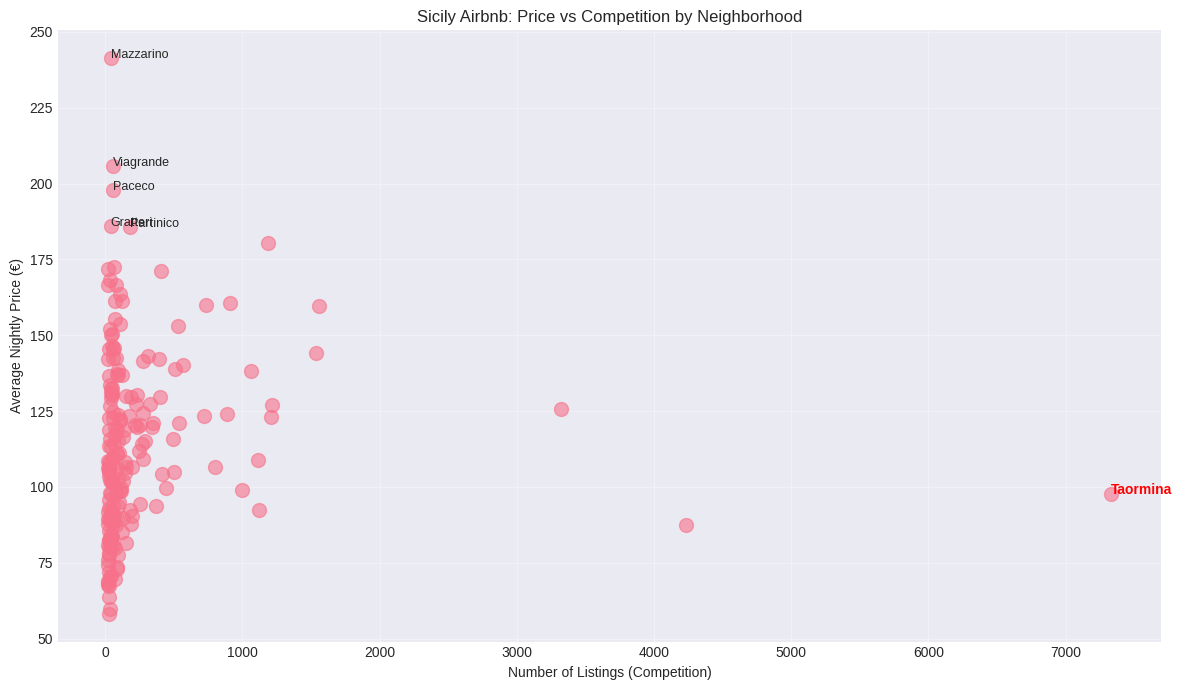


Investment Strategy Insight:
• High price + Low competition = Underserved market (opportunity)
• High price + High competition = Saturated premium market
• Low price + High competition = Saturated budget market


In [117]:
#scatter plot: Price vs Competition
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.scatter(neighborhood_revenue['num_listings'],
           neighborhood_revenue['avg_price'],
           s=100, alpha=0.6)

#label interesting neighborhoods
top_5 = neighborhood_revenue.head(5)
for idx in top_5.index:
    plt.annotate(idx,
                (neighborhood_revenue.loc[idx, 'num_listings'],
                 neighborhood_revenue.loc[idx, 'avg_price']),
                fontsize=9)

#label Taormina
if 'Taormina' in neighborhood_revenue.index:
    plt.annotate('Taormina',
                (neighborhood_revenue.loc['Palermo', 'num_listings'],
                 neighborhood_revenue.loc['Palermo', 'avg_price']),
                fontsize=10, color='red', fontweight='bold')

plt.xlabel('Number of Listings (Competition)')
plt.ylabel('Average Nightly Price (€)')
plt.title('Sicily Airbnb: Price vs Competition by Neighborhood')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInvestment Strategy Insight:")
print("• High price + Low competition = Underserved market (opportunity)")
print("• High price + High competition = Saturated premium market")
print("• Low price + High competition = Saturated budget market")

Simple investment score: higher price - good, lower competition - good

In [118]:
#values normalization
neighborhood_revenue['price_score'] = (neighborhood_revenue['avg_price'] - neighborhood_revenue['avg_price'].min()) / (neighborhood_revenue['avg_price'].max() - neighborhood_revenue['avg_price'].min())

#inversing of competition (fewer listings = higher score)
neighborhood_revenue['competition_score'] = 1 - ((neighborhood_revenue['num_listings'] - neighborhood_revenue['num_listings'].min()) / (neighborhood_revenue['num_listings'].max() - neighborhood_revenue['num_listings'].min()))

#combined score (equal weight)
neighborhood_revenue['investment_score'] = (neighborhood_revenue['price_score'] + neighborhood_revenue['competition_score']) / 2

#sort by investment score
best_investments = neighborhood_revenue.sort_values('investment_score', ascending=False)

print("Top 10 Investment Opportunities (High Price + Low Competition):")
print(best_investments[['avg_price', 'num_listings', 'investment_score']].head(10).round(2))

Top 10 Investment Opportunities (High Price + Low Competition):
                        avg_price  num_listings  investment_score
neighbourhood_cleansed                                           
Mazzarino                  241.34            38              1.00
Viagrande                  205.86            56              0.90
Paceco                     197.98            56              0.88
Gratteri                   185.85            39              0.85
Partinico                  185.65           181              0.84
Santa Maria di Licodia     171.85            20              0.81
Santa Venerina             172.62            61              0.81
Savoca                     168.29            31              0.80
Borgetto                   166.67            21              0.80
Rosolini                   166.45            78              0.79


In [119]:
#Palermo-related neighborhoods
palermo_keywords = ['Palermo', 'palermo']

#all neighborhoods with "Palermo" in the name
palermo_neighborhoods = [n for n in listings['neighbourhood_cleansed'].unique()
                         if any(keyword in str(n) for keyword in palermo_keywords)]

print(f"Found {len(palermo_neighborhoods)} Palermo-related neighborhoods:")
for n in sorted(palermo_neighborhoods):
    print(f"  • {n}")

#listings in Palermo area
palermo_listings = listings[listings['neighbourhood_cleansed'].isin(palermo_neighborhoods)]
print(f"\nTotal Palermo listings: {len(palermo_listings)}")

Found 1 Palermo-related neighborhoods:
  • Palermo

Total Palermo listings: 7330


In [120]:
#property types in Palermo
palermo_property_types = palermo_listings.groupby('property_type').agg({
    'price_clean': 'mean',
    'id': 'count'
}).round(2)

palermo_property_types.columns = ['avg_price', 'num_listings']
palermo_property_types = palermo_property_types[palermo_property_types['num_listings'] >= 5]
palermo_property_types = palermo_property_types.sort_values('avg_price', ascending=False)

print("\nPalermo Property Types (5+ listings):")
print(palermo_property_types)


Palermo Property Types (5+ listings):
                                    avg_price  num_listings
property_type                                              
Private room in hostel                 398.73            15
Room in hotel                          223.47            36
Entire villa                           222.80           151
Room in boutique hotel                 222.15            13
Entire serviced apartment              149.04            26
Private room in boat                   122.80             5
Boat                                   120.80            10
Entire home                            114.38           656
Private room in serviced apartment     113.00            10
Room in aparthotel                     112.40             5
Entire guest suite                     108.94            16
Private room in casa particular        104.58            12
Entire townhouse                       103.69            16
Entire condo                            98.38          1013
P

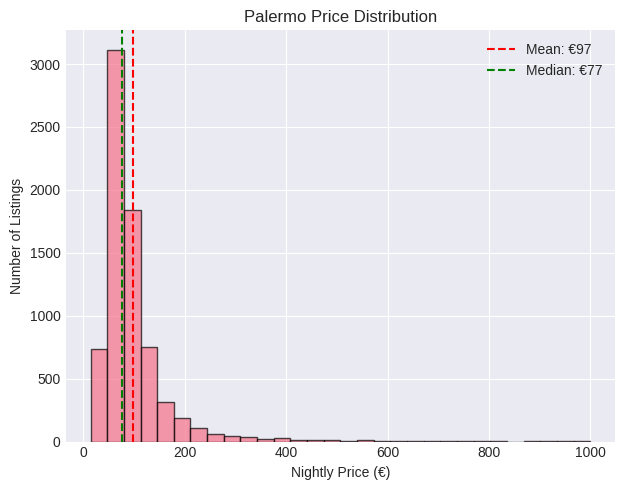

In [121]:
#Palermo prices
plt.figure(figsize=(12, 5))

#price distribution
plt.subplot(1, 2, 1)
plt.hist(palermo_listings['price_clean'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(palermo_listings['price_clean'].mean(), color='red', linestyle='--',
            label=f'Mean: €{palermo_listings["price_clean"].mean():.0f}')
plt.axvline(palermo_listings['price_clean'].median(), color='green', linestyle='--',
            label=f'Median: €{palermo_listings["price_clean"].median():.0f}')
plt.xlabel('Nightly Price (€)')
plt.ylabel('Number of Listings')
plt.title('Palermo Price Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [122]:
#comparing Palermo to Sicily market
print("=" * 60)
print("PALERMO vs SICILY COMPARISON")
print("=" * 60)

palermo_avg = palermo_listings['price_clean'].mean()
sicily_avg = listings['price_clean'].mean()

palermo_median = palermo_listings['price_clean'].median()
sicily_median = listings['price_clean'].median()

palermo_count = len(palermo_listings)
sicily_count = len(listings)

print(f"""
PRICES:
Palermo average:  €{palermo_avg:.2f}
Sicily average:   €{sicily_avg:.2f}
Difference:       {((palermo_avg/sicily_avg - 1) * 100):+.1f}%

Palermo median:   €{palermo_median:.2f}
Sicily median:    €{sicily_median:.2f}

MARKET SIZE:
Palermo listings: {palermo_count:,}
Sicily total:     {sicily_count:,}
Palermo share:    {(palermo_count/sicily_count * 100):.1f}%

INSIGHT:
""")

if palermo_avg > sicily_avg:
    print(f"Palermo commands {((palermo_avg/sicily_avg - 1) * 100):.0f}% premium over Sicily average")
else:
    print(f"Palermo is {((1 - palermo_avg/sicily_avg) * 100):.0f}% cheaper than Sicily average")

if palermo_count/sicily_count > 0.15:
    print(f"Palermo is a major market ({(palermo_count/sicily_count * 100):.0f}% of Sicily)")
else:
    print(f"Palermo is a smaller market ({(palermo_count/sicily_count * 100):.0f}% of Sicily)")

PALERMO vs SICILY COMPARISON

PRICES:
Palermo average:  €97.49
Sicily average:   €117.19
Difference:       -16.8%

Palermo median:   €77.00
Sicily median:    €86.00

MARKET SIZE:
Palermo listings: 7,330
Sicily total:     50,394
Palermo share:    14.5%

INSIGHT:

Palermo is 17% cheaper than Sicily average
Palermo is a smaller market (15% of Sicily)


In [123]:
neighborhood_name = 'Palermo'

specific = listings[listings['neighbourhood_cleansed'] == neighborhood_name]

print(f"\n{neighborhood_name} Deep Dive:")
print(f"Listings: {len(specific)}")
print(f"Avg price: €{specific['price_clean'].mean():.2f}")
print(f"Price range: €{specific['price_clean'].min():.0f} - €{specific['price_clean'].max():.0f}")

#top property types
print(f"\nTop property types:")
print(specific['property_type'].value_counts().head())

#room types
print(f"\nRoom type distribution:")
print(specific['room_type'].value_counts())


Palermo Deep Dive:
Listings: 7330
Avg price: €97.49
Price range: €14 - €1000

Top property types:
property_type
Entire rental unit                   3195
Entire condo                         1013
Entire home                           656
Private room in rental unit           623
Private room in bed and breakfast     492
Name: count, dtype: int64

Room type distribution:
room_type
Entire home/apt    5637
Private room       1636
Shared room          34
Hotel room           23
Name: count, dtype: int64


In [124]:
print("=" * 60)
print("PALERMO INVESTMENT ANALYSIS")
print("=" * 60)

palermo_data = listings[listings['neighbourhood_cleansed'].str.contains('Palermo', case=False, na=False)]

print(f"""
MARKET PROFILE:
Large market: {len(palermo_data):,} listings
Competitive pricing: €{palermo_data['price_clean'].mean():.2f}/night
Below Sicily average by {((1 - palermo_data['price_clean'].mean()/listings['price_clean'].mean()) * 100):.0f}%

OPPORTUNITY:
High volume market (major city = consistent demand)
Lower prices = accessible to more tourists
Entire homes dominate = target market is clear

CONSIDERATIONS:
More competition  ({len(palermo_data):,} listings)
Lower nightly rates = need higher occupancy
Budget-conscious travelers = different guest profile

RECOMMENDED STRATEGY FOR PALERMO:
Target entire rental units
Price competitively (€70-100/night)
Focus on occupancy over premium pricing
Consider proximity to university/city center
Emphasize value-for-money positioning
""")

PALERMO INVESTMENT ANALYSIS

MARKET PROFILE:
Large market: 7,330 listings
Competitive pricing: €97.49/night
Below Sicily average by 17%

OPPORTUNITY:
High volume market (major city = consistent demand)
Lower prices = accessible to more tourists
Entire homes dominate = target market is clear

CONSIDERATIONS:
More competition  (7,330 listings)
Lower nightly rates = need higher occupancy 
Budget-conscious travelers = different guest profile

RECOMMENDED STRATEGY FOR PALERMO:
Target entire rental units
Price competitively (€70-100/night)
Focus on occupancy over premium pricing
Consider proximity to university/city center
Emphasize value-for-money positioning



In [125]:
#Palermo vs Taormina (premium market)
taormina_data = listings[listings['neighbourhood_cleansed'].str.contains('Taormina', case=False, na=False)]
palermo_data = listings[listings['neighbourhood_cleansed'].str.contains('Palermo', case=False, na=False)]

print("=" * 60)
print("MARKET COMPARISON: PALERMO vs TAORMINA")
print("=" * 60)

comparison = pd.DataFrame({
    'Palermo': [
        len(palermo_data),
        f"€{palermo_data['price_clean'].mean():.2f}",
        f"€{palermo_data['price_clean'].median():.2f}",
        f"{(palermo_data['room_type'] == 'Entire home/apt').sum() / len(palermo_data) * 100:.0f}%"
    ],
    'Taormina': [
        len(taormina_data),
        f"€{taormina_data['price_clean'].mean():.2f}",
        f"€{taormina_data['price_clean'].median():.2f}",
        f"{(taormina_data['room_type'] == 'Entire home/apt').sum() / len(taormina_data) * 100:.0f}%"
    ]
}, index=['Listings', 'Avg Price', 'Median Price', '% Entire Homes'])

print(comparison)

print(f"""

INVESTMENT DECISION:

CHOOSE TAORMINA IF:
Premium positioning
Higher nightly rates matter more
Luxury/high-budget tourists
Higher competition ({len(taormina_data)} listings)

CHOOSE PALERMO IF:
Volume over premium pricing
Students, business travelers, budget tourists
Year-round demand (major city vs seasonal resort)
Lower entry cost

SWEET SPOT: Areas NEAR Palermo
""")

MARKET COMPARISON: PALERMO vs TAORMINA
               Palermo Taormina
Listings          7330     1187
Avg Price       €97.49  €180.32
Median Price    €77.00  €146.00
% Entire Homes     77%      82%


INVESTMENT DECISION:

CHOOSE TAORMINA IF:
Premium positioning
Higher nightly rates matter more
Luxury/high-budget tourists
Higher competition (1187 listings)

CHOOSE PALERMO IF:
Volume over premium pricing
Students, business travelers, budget tourists
Year-round demand (major city vs seasonal resort)
Lower entry cost

SWEET SPOT: Areas NEAR Palermo



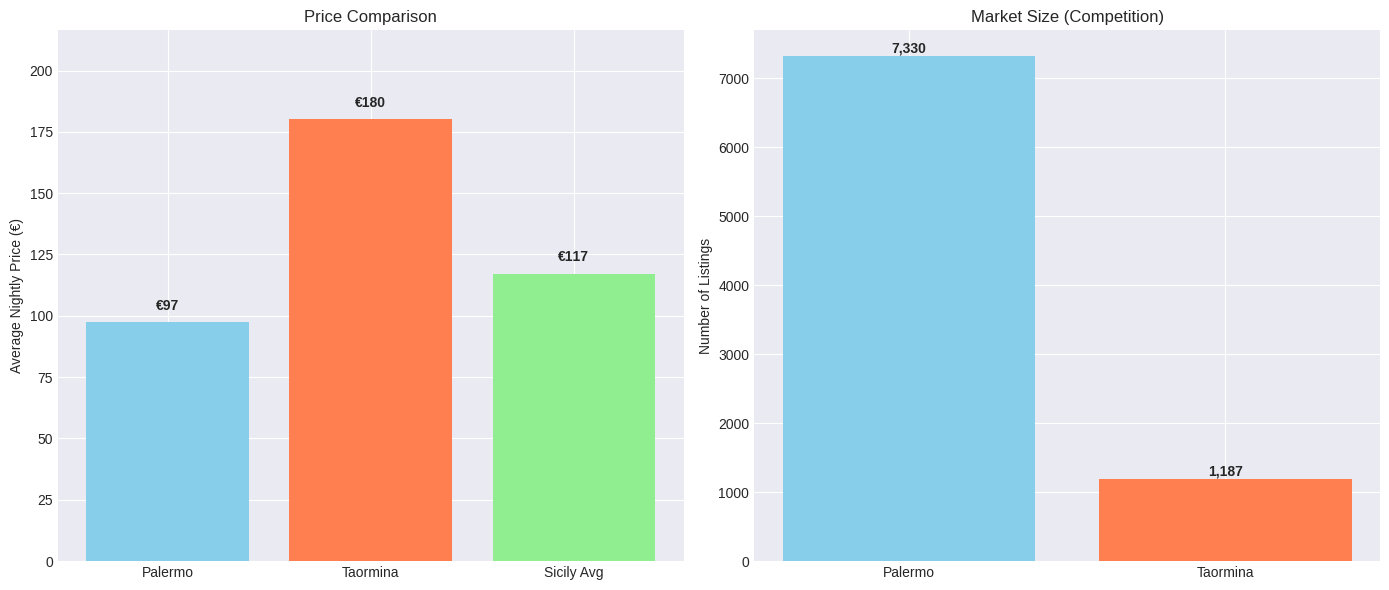

In [126]:
#comparison chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Price comparison
markets = ['Palermo', 'Taormina', 'Sicily Avg']
prices = [
    palermo_data['price_clean'].mean(),
    taormina_data['price_clean'].mean(),
    listings['price_clean'].mean()
]

axes[0].bar(markets, prices, color=['skyblue', 'coral', 'lightgreen'])
axes[0].set_ylabel('Average Nightly Price (€)')
axes[0].set_title('Price Comparison')
axes[0].set_ylim(0, max(prices) * 1.2)

for i, v in enumerate(prices):
    axes[0].text(i, v + 5, f'€{v:.0f}', ha='center', fontweight='bold')

#market size
listings_count = [len(palermo_data), len(taormina_data)]
axes[1].bar(['Palermo', 'Taormina'], listings_count, color=['skyblue', 'coral'])
axes[1].set_ylabel('Number of Listings')
axes[1].set_title('Market Size (Competition)')

for i, v in enumerate(listings_count):
    axes[1].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Minimum nights indicate seasonality

High minimum nights in summer = property owners know demand is high

In [127]:
palermo_data = listings[listings['neighbourhood_cleansed'].str.contains('Palermo', case=False, na=False)]

print("Minimum Nights Analysis (Seasonality Proxy):")
print(f"Average minimum nights: {palermo_data['minimum_nights'].mean():.1f}")
print(f"Median minimum nights: {palermo_data['minimum_nights'].median():.0f}")

#distribution
print("\nMinimum nights distribution:")
print(palermo_data['minimum_nights'].value_counts().head(10))

#high minimum nights (likely summer-only)
seasonal_properties = palermo_data[palermo_data['minimum_nights'] >= 7]
print(f"\nProperties requiring 7+ night stays: {len(seasonal_properties)} ({len(seasonal_properties)/len(palermo_data)*100:.1f}%)")
print(f"Average price for seasonal properties: €{seasonal_properties['price_clean'].mean():.2f}")

Minimum Nights Analysis (Seasonality Proxy):
Average minimum nights: 4.8
Median minimum nights: 2

Minimum nights distribution:
minimum_nights
2     2881
1     2523
3      962
31     660
4      142
5       84
7       29
6       19
15       6
20       4
Name: count, dtype: int64

Properties requiring 7+ night stays: 719 (9.8%)
Average price for seasonal properties: €103.14


In [128]:
#Palermo and surrounding areas
print("=" * 70)
print("PALERMO METROPOLITAN AREA ANALYSIS")
print("=" * 70)

#Palermo city and nearby towns
palermo_city = ['Palermo']
nearby_towns = ['Mondello', 'Monreale', 'Cefalù', 'Bagheria', 'Terrasini',
                'Isola delle Femmine', 'Carini', 'Villabate', 'Ficarazzi']

#which towns actually exist in dataset
available_nearby = [town for town in nearby_towns
                    if town in listings['neighbourhood_cleansed'].values]

print(f"Nearby towns found in data: {', '.join(available_nearby) if available_nearby else 'None'}")

#filter
palermo_city_data = listings[listings['neighbourhood_cleansed'].isin(palermo_city)]
nearby_data = listings[listings['neighbourhood_cleansed'].isin(available_nearby)]

if len(palermo_city_data) > 0 and len(nearby_data) > 0:

    comparison = pd.DataFrame({
        'Palermo City': [
            len(palermo_city_data),
            f"€{palermo_city_data['price_clean'].mean():.2f}",
            f"€{palermo_city_data['price_clean'].median():.2f}",
            f"{palermo_city_data['minimum_nights'].mean():.1f}"
        ],
        'Nearby Towns': [
            len(nearby_data),
            f"€{nearby_data['price_clean'].mean():.2f}",
            f"€{nearby_data['price_clean'].median():.2f}",
            f"{nearby_data['minimum_nights'].mean():.1f}"
        ]
    }, index=['Listings', 'Avg Price', 'Median Price', 'Avg Min Nights'])

    print("\n")
    print(comparison)

    print("\nINVESTMENT INSIGHTS:")

    #price comparison
    palermo_avg = palermo_city_data['price_clean'].mean()
    nearby_avg = nearby_data['price_clean'].mean()

    if nearby_avg > palermo_avg:
        diff = ((nearby_avg / palermo_avg - 1) * 100)
        print(f"Nearby towns charge {diff:.0f}% MORE than Palermo")
        print(f"Suggests: Beach/resort premium or luxury properties")
    else:
        diff = ((1 - nearby_avg / palermo_avg) * 100)
        print(f"Nearby towns charge {diff:.0f}% LESS than Palermo")
        print(f"Opportunity: Lower prices, potentially less competition")

    #competition comparison
    if len(nearby_data) < len(palermo_city_data):
        print(f"Less competition in nearby areas ({len(nearby_data)} vs {len(palermo_city_data)} listings)")
        print(f"Opportunity: Serve tourists seeking proximity without city prices")

    #minimum nights (seasonality indicator)
    if nearby_data['minimum_nights'].mean() > palermo_city_data['minimum_nights'].mean():
        print(f"Nearby towns require longer stays - More seasonal/vacation-focused")
    else:
        print(f"Similar stay requirements - Similar guest profiles")

else:
    print("\nNot enough data for nearby towns comparison")
    print("Analyzing Palermo individually...")

    if len(palermo_city_data) > 0:
        print(f"\nPalermo City Stats:")
        print(f"  Listings: {len(palermo_city_data):,}")
        print(f"  Avg price: €{palermo_city_data['price_clean'].mean():.2f}")
        print(f"  Median price: €{palermo_city_data['price_clean'].median():.2f}")

PALERMO METROPOLITAN AREA ANALYSIS
Nearby towns found in data: Monreale, Bagheria, Terrasini, Isola delle Femmine, Carini, Villabate, Ficarazzi


               Palermo City Nearby Towns
Listings               7330         1197
Avg Price            €97.49      €110.63
Median Price         €77.00       €81.00
Avg Min Nights          4.8          6.1

INVESTMENT INSIGHTS:
Nearby towns charge 13% MORE than Palermo
Suggests: Beach/resort premium or luxury properties
Less competition in nearby areas (1197 vs 7330 listings)
Opportunity: Serve tourists seeking proximity without city prices
Nearby towns require longer stays - More seasonal/vacation-focused


In [129]:
#detailed breakdown of each nearby area
print("\n" + "=" * 70)
print("INDIVIDUAL TOWN ANALYSIS (Palermo Area)")
print("=" * 70)

#all Palermo-area towns
all_palermo_area = palermo_city + available_nearby

area_analysis = []

for town in all_palermo_area:
    town_data = listings[listings['neighbourhood_cleansed'] == town]

    if len(town_data) >= 5:
        area_analysis.append({
            'Town': town,
            'Listings': len(town_data),
            'Avg_Price': town_data['price_clean'].mean(),
            'Median_Price': town_data['price_clean'].median(),
            'Min_Nights': town_data['minimum_nights'].mean()
        })

if area_analysis:
    df_area = pd.DataFrame(area_analysis)
    df_area = df_area.sort_values('Avg_Price', ascending=False)

    print("\nPalermo Metropolitan Area Rankings:")
    print(df_area.to_string(index=False))

    print("\nRECOMMENDATIONS:")

    #best value
    best_value = df_area.loc[df_area['Median_Price'].idxmin()]
    print(f"\nBest Value: {best_value['Town']}")
    print(f"Median: €{best_value['Median_Price']:.0f}/night")
    print(f"{int(best_value['Listings'])} listings (manageable competition)")

    #highest revenue potential
    highest_price = df_area.loc[df_area['Avg_Price'].idxmax()]
    print(f"\nHighest Revenue Potential: {highest_price['Town']}")
    print(f"Average: €{highest_price['Avg_Price']:.0f}/night")
    print(f"Target luxury/premium segment")

    #best market size
    largest_market = df_area.loc[df_area['Listings'].idxmax()]
    print(f"\nLargest Market: {largest_market['Town']}")
    print(f"{int(largest_market['Listings'])} listings")
    print(f"Proven demand, established market")
else:
    print("\nNot enough nearby towns with sufficient listings")


INDIVIDUAL TOWN ANALYSIS (Palermo Area)

Palermo Metropolitan Area Rankings:
               Town  Listings  Avg_Price  Median_Price  Min_Nights
             Carini       327 127.220183          90.0    5.544343
          Ficarazzi        31 126.741935          78.0   10.612903
          Terrasini       338 119.695266          85.0    6.038462
           Monreale       128 101.804688          77.0    9.906250
            Palermo      7330  97.491951          77.0    4.815143
           Bagheria       178  92.303371          70.0    4.724719
Isola delle Femmine       189  87.703704          73.0    5.031746
          Villabate         6  66.166667          59.5    6.500000

RECOMMENDATIONS:

Best Value: Villabate
Median: €60/night
6 listings (manageable competition)

Highest Revenue Potential: Carini
Average: €127/night
Target luxury/premium segment

Largest Market: Palermo
7330 listings
Proven demand, established market


In [130]:
print("=" * 70)
print("STRATEGIC INVESTMENT INSIGHTS - PALERMO AREA")
print("=" * 70)

palermo_price = 97.49
carini_price = 127.22
terrasini_price = 119.70

print(f"""
KEY DISCOVERY: Suburban Premium

UNEXPECTED FINDING:
Smaller towns around Palermo command HIGHER prices than the capital city.

WHY THIS MATTERS:

CARINI (€127/night - 30% premium over Palermo):
327 listings (manageable competition vs Palermo's 7,330)
Likely coastal location with beach access
Attracts tourists seeking relaxation over city tourism
OPPORTUNITY: Less competition, higher prices, beach appeal

TERRASINI (€120/night - 23% premium):
338 listings (similar to Carini)
Another coastal town
Consistent pricing power
OPPORTUNITY: Proven market, still less saturated than Palermo

PALERMO CITY (€97/night):
Lowest price in the metro area
BUT: 7,330 listings (MASSIVE competition)
Urban tourism, business travelers, year-round demand
CHALLENGE: High competition drives prices down

INVESTMENT STRATEGY RECOMMENDATIONS:

FOR PREMIUM INVESTORS:
Target: Carini or Terrasini
Why: 30% higher nightly rates
Profile: Beach properties, summer-focused
Risk: Higher minimum nights ({5.5:.1f} days) = more seasonal

FOR VOLUME INVESTORS:
Target: Palermo city
Why: Proven massive demand (7,330 listings shows market size)
Profile: Urban apartments, year-round bookings
Risk: Heavy competition, lower margins per night

FOR VALUE INVESTORS:
Target: Bagheria (€92/night, 178 listings)
Why: Close to Palermo prices but 97% less competition
Profile: Budget-conscious travelers, longer stays
Opportunity: Underserved market segment

AVOID (For Now):
Villabate: Only 6 listings = unproven market
Isola delle Femmine: Lower prices (€88) despite being coastal
""")

#potential revenue difference
print("\n" + "=" * 70)
print("REVENUE COMPARISON (50% Occupancy Assumption)")
print("=" * 70)

occupancy = 0.5
days_per_year = 365

carini_revenue = carini_price * days_per_year * occupancy
palermo_revenue = palermo_price * days_per_year * occupancy
diff = carini_revenue - palermo_revenue

print(f"""
Carini Property:     €{carini_revenue:,.0f}/year
Palermo Property:    €{palermo_revenue:,.0f}/year
Difference:          €{diff:,.0f}/year ({(diff/palermo_revenue*100):.0f}% more)

A property in Carini could generate €{diff:,.0f} MORE per year
than a similar property in Palermo city.

BUT: Consider these factors:
Carini may be more seasonal (higher min nights = {5.5:.1f} vs {4.8:.1f})
Palermo has more consistent year-round demand
Carini needs beach access to justify premium
Competition is 22x less in Carini (327 vs 7,330)
""")

STRATEGIC INVESTMENT INSIGHTS - PALERMO AREA

KEY DISCOVERY: Suburban Premium

UNEXPECTED FINDING:
Smaller towns around Palermo command HIGHER prices than the capital city.

WHY THIS MATTERS:

CARINI (€127/night - 30% premium over Palermo):
327 listings (manageable competition vs Palermo's 7,330)
Likely coastal location with beach access
Attracts tourists seeking relaxation over city tourism
OPPORTUNITY: Less competition, higher prices, beach appeal

TERRASINI (€120/night - 23% premium):
338 listings (similar to Carini)
Another coastal town
Consistent pricing power
OPPORTUNITY: Proven market, still less saturated than Palermo

PALERMO CITY (€97/night):
Lowest price in the metro area
BUT: 7,330 listings (MASSIVE competition)
Urban tourism, business travelers, year-round demand
CHALLENGE: High competition drives prices down

INVESTMENT STRATEGY RECOMMENDATIONS:

FOR PREMIUM INVESTORS:
Target: Carini or Terrasini
Why: 30% higher nightly rates
Profile: Beach properties, summer-focused
Risk

Visualizations

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#colors
colors = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'neutral': '#5C6E91'
}

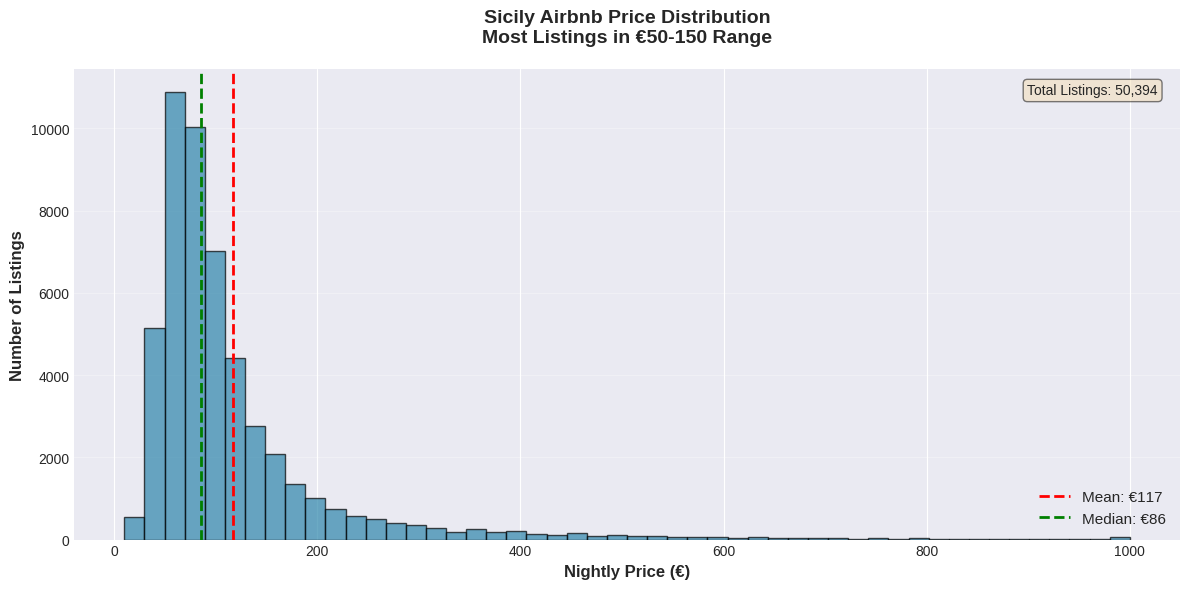

In [132]:
#price distribution across Sicily
fig, ax = plt.subplots(figsize=(12, 6))

#histogram
ax.hist(listings['price_clean'], bins=50, color=colors['primary'],
        edgecolor='black', alpha=0.7)

#mean and median lines
mean_price = listings['price_clean'].mean()
median_price = listings['price_clean'].median()

ax.axvline(mean_price, color='red', linestyle='--', linewidth=2,
           label=f'Mean: €{mean_price:.0f}')
ax.axvline(median_price, color='green', linestyle='--', linewidth=2,
           label=f'Median: €{median_price:.0f}')

#labels and styling
ax.set_xlabel('Nightly Price (€)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Listings', fontsize=12, fontweight='bold')
ax.set_title('Sicily Airbnb Price Distribution\nMost Listings in €50-150 Range',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

#text annotation
ax.text(0.98, 0.97, f'Total Listings: {len(listings):,}',
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

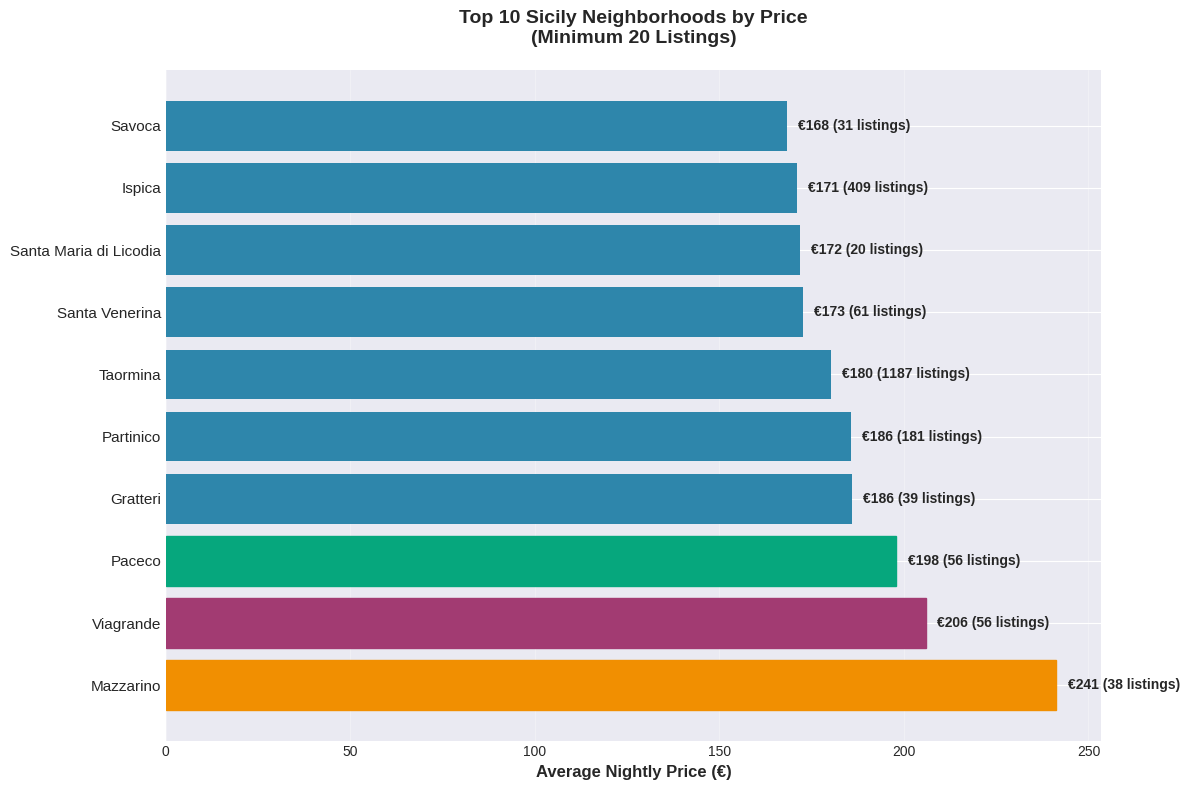

In [133]:
#op 10 neighborhoods by avg price
neighborhood_revenue = listings.groupby('neighbourhood_cleansed')['price_clean'].agg([
    ('avg_price', 'mean'),
    ('num_listings', 'count')
]).round(2)

#filter for meaningful sample (20+ listings)
neighborhood_revenue = neighborhood_revenue[neighborhood_revenue['num_listings'] >= 20]
top_10 = neighborhood_revenue.sort_values('avg_price', ascending=False).head(10)

#horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(range(len(top_10)), top_10['avg_price'], color=colors['primary'])

#color
bars[0].set_color(colors['accent'])
bars[1].set_color(colors['secondary'])
bars[2].set_color(colors['success'])

#value labels
for i, (idx, row) in enumerate(top_10.iterrows()):
    ax.text(row['avg_price'] + 3, i,
            f"€{row['avg_price']:.0f} ({int(row['num_listings'])} listings)",
            va='center', fontsize=10, fontweight='bold')

#styling
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10.index, fontsize=11)
ax.set_xlabel('Average Nightly Price (€)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Sicily Neighborhoods by Price\n(Minimum 20 Listings)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()

plt.show()

/tmp/ipython-input-4216336888.py:67: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


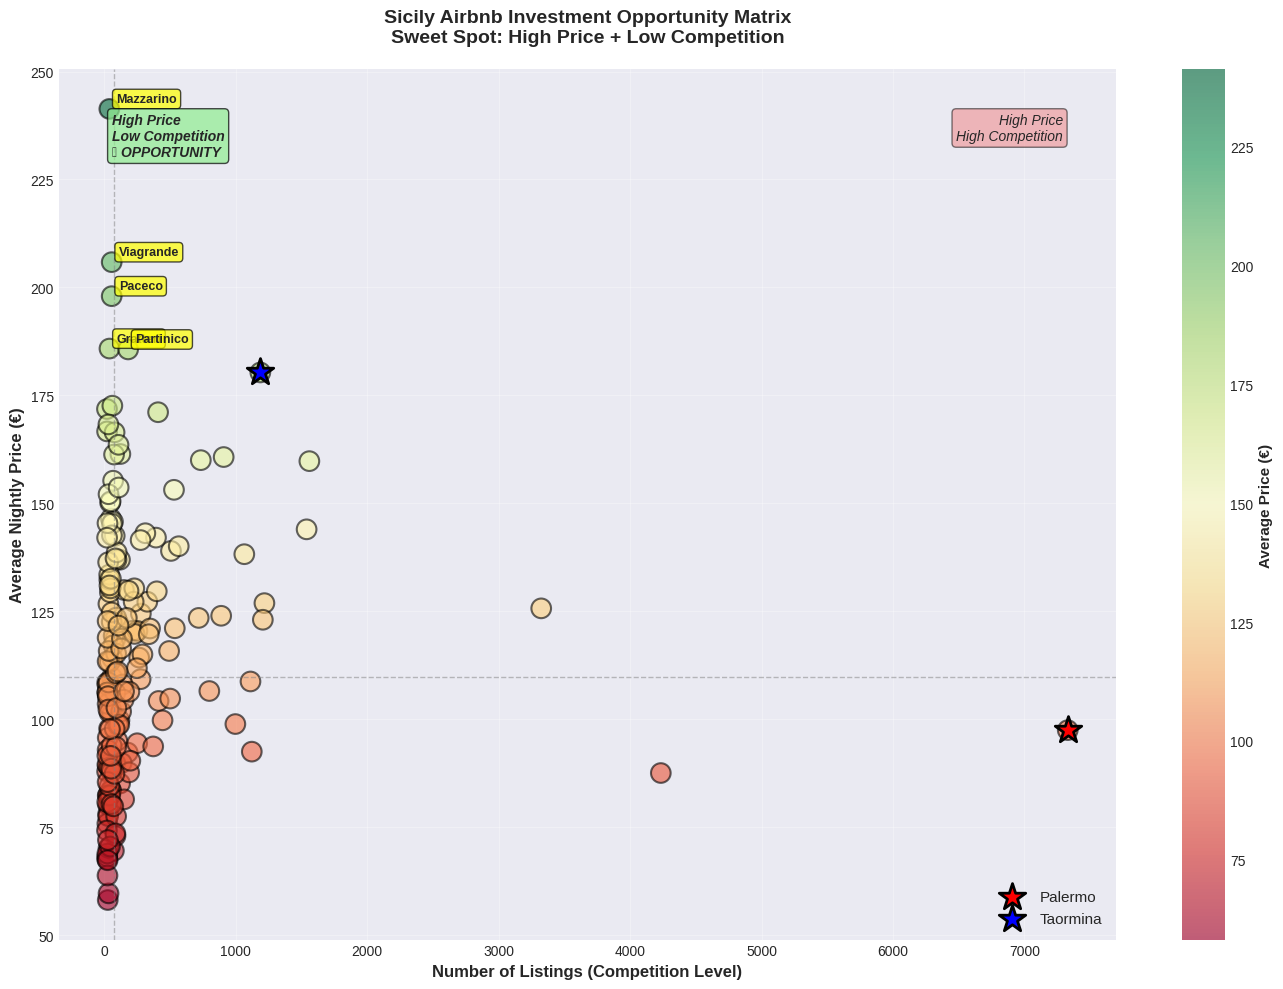

In [134]:
#investment opportunity matrix
fig, ax = plt.subplots(figsize=(14, 10))

#neighborhoods with 20+ listings
plot_data = neighborhood_revenue.copy()

#scatter plot
scatter = ax.scatter(plot_data['num_listings'],
                    plot_data['avg_price'],
                    s=200, alpha=0.6, c=plot_data['avg_price'],
                    cmap='RdYlGn', edgecolors='black', linewidth=1.5)

#color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Price (€)', fontsize=11, fontweight='bold')

#labelling interesting points
#top 5 by price
top_5_price = plot_data.nlargest(5, 'avg_price')
for idx in top_5_price.index:
    ax.annotate(idx,
               (plot_data.loc[idx, 'num_listings'],
                plot_data.loc[idx, 'avg_price']),
               fontsize=9, fontweight='bold',
               xytext=(5, 5), textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

#highlighting Palermo and Taormina if present
if 'Palermo' in plot_data.index:
    palermo_point = plot_data.loc['Palermo']
    ax.scatter(palermo_point['num_listings'], palermo_point['avg_price'],
              s=400, marker='*', color='red', edgecolors='black', linewidth=2,
              label='Palermo', zorder=5)

if 'Taormina' in plot_data.index:
    taormina_point = plot_data.loc['Taormina']
    ax.scatter(taormina_point['num_listings'], taormina_point['avg_price'],
              s=400, marker='*', color='blue', edgecolors='black', linewidth=2,
              label='Taormina', zorder=5)

#quadrant lines
median_listings = plot_data['num_listings'].median()
median_price = plot_data['avg_price'].median()

ax.axvline(median_listings, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(median_price, color='gray', linestyle='--', alpha=0.5, linewidth=1)

#quadrant labels
ax.text(0.95, 0.95, 'High Price\nHigh Competition',
        transform=ax.transAxes, fontsize=10, style='italic',
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

ax.text(0.05, 0.95, 'High Price\nLow Competition\n⭐ OPPORTUNITY',
        transform=ax.transAxes, fontsize=10, style='italic', fontweight='bold',
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

#labels and styling
ax.set_xlabel('Number of Listings (Competition Level)', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Nightly Price (€)', fontsize=12, fontweight='bold')
ax.set_title('Sicily Airbnb Investment Opportunity Matrix\nSweet Spot: High Price + Low Competition',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

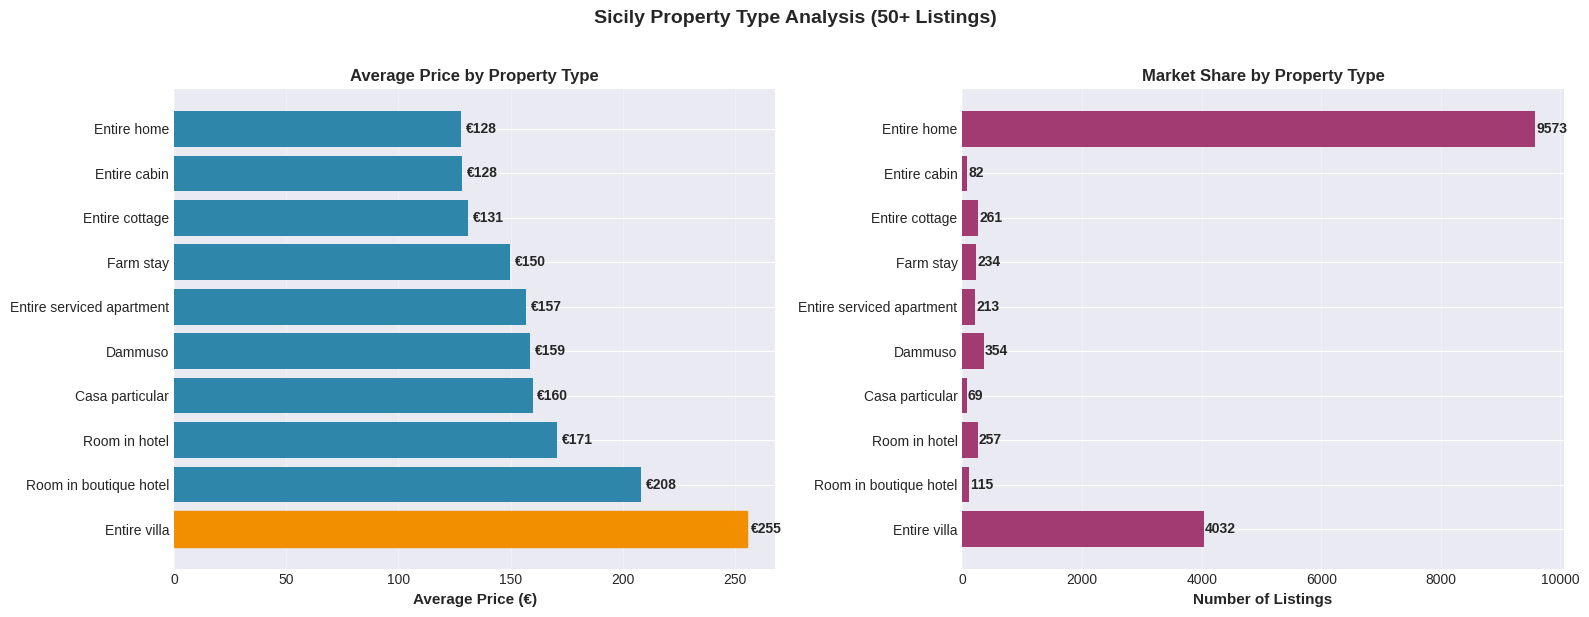

In [135]:
#property Type Comparison
property_analysis = listings.groupby('property_type').agg({
    'price_clean': 'mean',
    'id': 'count'
}).round(2)

property_analysis.columns = ['avg_price', 'num_listings']

#property types with 50+ listings
popular_properties = property_analysis[property_analysis['num_listings'] >= 50]
popular_properties = popular_properties.sort_values('avg_price', ascending=False).head(10)

#figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#avg price
bars1 = ax1.barh(range(len(popular_properties)), popular_properties['avg_price'],
                 color=colors['primary'])
bars1[0].set_color(colors['accent'])  # Highlight top

for i, (idx, row) in enumerate(popular_properties.iterrows()):
    ax1.text(row['avg_price'] + 2, i, f"€{row['avg_price']:.0f}",
            va='center', fontsize=10, fontweight='bold')

ax1.set_yticks(range(len(popular_properties)))
ax1.set_yticklabels(popular_properties.index, fontsize=10)
ax1.set_xlabel('Average Price (€)', fontsize=11, fontweight='bold')
ax1.set_title('Average Price by Property Type', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

#market share
ax2.barh(range(len(popular_properties)), popular_properties['num_listings'],
         color=colors['secondary'])

for i, (idx, row) in enumerate(popular_properties.iterrows()):
    ax2.text(row['num_listings'] + 20, i, f"{int(row['num_listings'])}",
            va='center', fontsize=10, fontweight='bold')

ax2.set_yticks(range(len(popular_properties)))
ax2.set_yticklabels(popular_properties.index, fontsize=10)
ax2.set_xlabel('Number of Listings', fontsize=11, fontweight='bold')
ax2.set_title('Market Share by Property Type', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

fig.suptitle('Sicily Property Type Analysis (50+ Listings)',
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

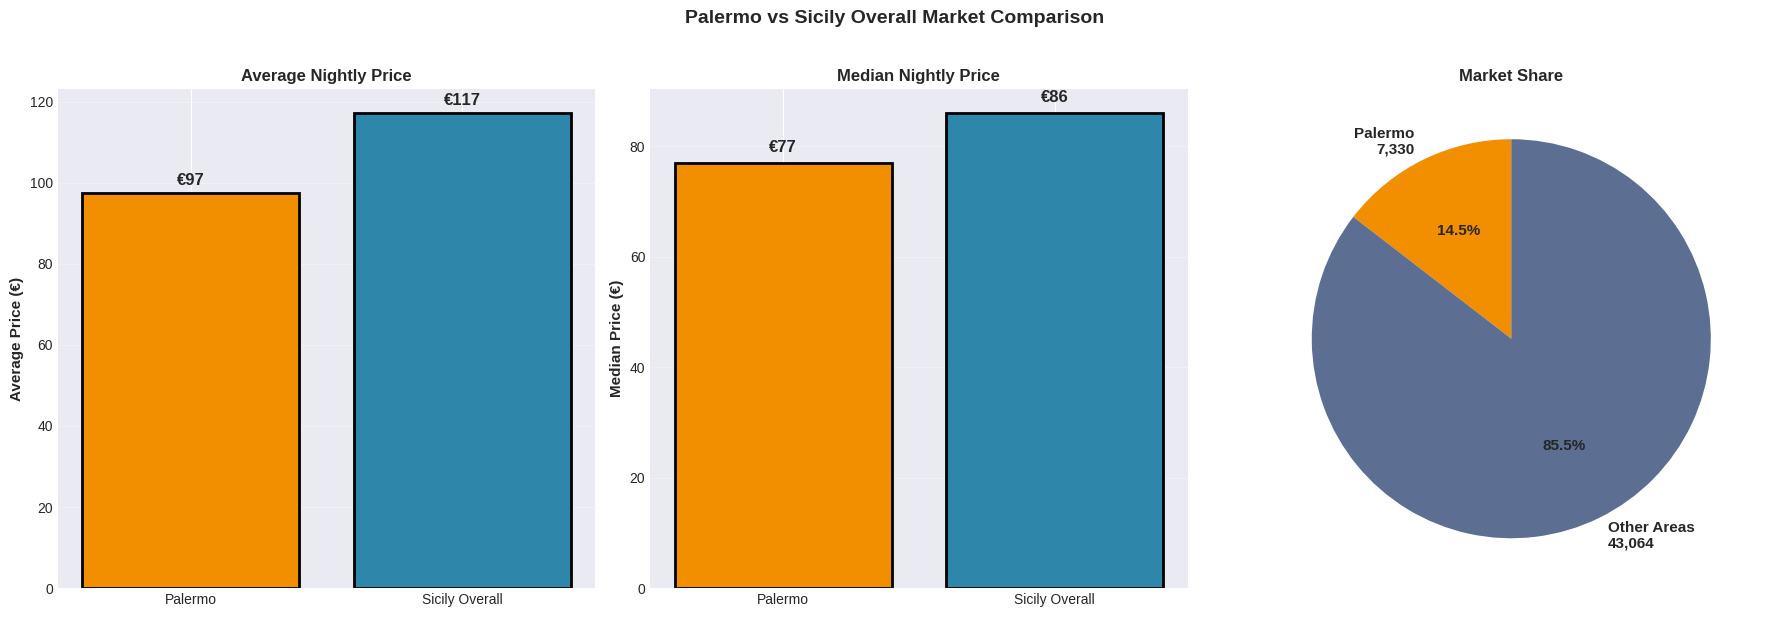

In [136]:
#Palermo vs Sicily
palermo_data = listings[listings['neighbourhood_cleansed'].str.contains('Palermo', case=False, na=False)]

comparison_data = {
    'Market': ['Palermo', 'Sicily Overall'],
    'Avg_Price': [palermo_data['price_clean'].mean(), listings['price_clean'].mean()],
    'Median_Price': [palermo_data['price_clean'].median(), listings['price_clean'].median()],
    'Num_Listings': [len(palermo_data), len(listings)]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#avg price
axes[0].bar(comparison_data['Market'], comparison_data['Avg_Price'],
           color=[colors['accent'], colors['primary']], edgecolor='black', linewidth=2)
for i, v in enumerate(comparison_data['Avg_Price']):
    axes[0].text(i, v + 2, f'€{v:.0f}', ha='center', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Average Price (€)', fontsize=11, fontweight='bold')
axes[0].set_title('Average Nightly Price', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

#median price
axes[1].bar(comparison_data['Market'], comparison_data['Median_Price'],
           color=[colors['accent'], colors['primary']], edgecolor='black', linewidth=2)
for i, v in enumerate(comparison_data['Median_Price']):
    axes[1].text(i, v + 2, f'€{v:.0f}', ha='center', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Median Price (€)', fontsize=11, fontweight='bold')
axes[1].set_title('Median Nightly Price', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

#market share
market_share = [len(palermo_data), len(listings) - len(palermo_data)]
labels = [f'Palermo\n{len(palermo_data):,}', f'Other Areas\n{len(listings) - len(palermo_data):,}']
colors_pie = [colors['accent'], colors['neutral']]

axes[2].pie(market_share, labels=labels, autopct='%1.1f%%', startangle=90,
           colors=colors_pie, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[2].set_title('Market Share', fontsize=12, fontweight='bold')

fig.suptitle('Palermo vs Sicily Overall Market Comparison',
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

Superhost Analysis

In [137]:
print("=" * 70)
print("BUSINESS QUESTION 3: SUPERHOST PERFORMANCE ANALYSIS")
print("=" * 70)

#if host_is_superhost column exists
if 'host_is_superhost' in listings.columns:

    #cleaning the superhost column
    listings['is_superhost'] = listings['host_is_superhost'].isin(['t', True, 't ', 'true'])

    #data split
    superhosts = listings[listings['is_superhost'] == True]
    regular_hosts = listings[listings['is_superhost'] == False]

    print(f"\nSuperhost listings: {len(superhosts):,} ({len(superhosts)/len(listings)*100:.1f}%)")
    print(f"Regular listings: {len(regular_hosts):,} ({len(regular_hosts)/len(listings)*100:.1f}%)")

    #price comparison
    superhost_avg = superhosts['price_clean'].mean()
    regular_avg = regular_hosts['price_clean'].mean()
    price_premium = ((superhost_avg / regular_avg - 1) * 100)

    print(f"\nPRICING:")
    print(f"Superhost average: €{superhost_avg:.2f}/night")
    print(f"Regular average:   €{regular_avg:.2f}/night")
    print(f"Premium:           {price_premium:+.1f}%")

    #scores comparison
    if 'review_scores_rating' in listings.columns:
        superhost_rating = superhosts[superhosts['review_scores_rating'] > 0]['review_scores_rating'].mean()
        regular_rating = regular_hosts[regular_hosts['review_scores_rating'] > 0]['review_scores_rating'].mean()

        print(f"\nREVIEW SCORES:")
        print(f"Superhost rating: {superhost_rating:.2f}/5.0")
        print(f"Regular rating:   {regular_rating:.2f}/5.0")
        print(f"Difference:       {(superhost_rating - regular_rating):+.2f} points")

    #number of reviews comparison
    if 'number_of_reviews' in listings.columns:
        superhost_reviews = superhosts['number_of_reviews'].mean()
        regular_reviews = regular_hosts['number_of_reviews'].mean()

        print(f"\nNUMBER OF REVIEWS:")
        print(f"Superhost average: {superhost_reviews:.1f} reviews")
        print(f"Regular average:   {regular_reviews:.1f} reviews")
        print(f"Difference:        {((superhost_reviews / regular_reviews - 1) * 100):+.0f}%")

else:
    print("host_is_superhost column not found in dataset")

BUSINESS QUESTION 3: SUPERHOST PERFORMANCE ANALYSIS

Superhost listings: 12,437 (24.7%)
Regular listings: 37,957 (75.3%)

PRICING:
Superhost average: €124.00/night
Regular average:   €114.95/night
Premium:           +7.9%

REVIEW SCORES:
Superhost rating: 4.86/5.0
Regular rating:   4.71/5.0
Difference:       +0.15 points

NUMBER OF REVIEWS:
Superhost average: 54.0 reviews
Regular average:   13.0 reviews
Difference:        +314%


In [138]:
# superhosts performance across property types
if 'host_is_superhost' in listings.columns and 'property_type' in listings.columns:

    print("\n" + "=" * 70)
    print("SUPERHOST PERFORMANCE BY PROPERTY TYPE")
    print("=" * 70)

    #top property types
    top_property_types = listings['property_type'].value_counts().head(5).index

    for prop_type in top_property_types:
        prop_data = listings[listings['property_type'] == prop_type]

        superhosts_prop = prop_data[prop_data['is_superhost'] == True]
        regular_prop = prop_data[prop_data['is_superhost'] == False]

        if len(superhosts_prop) > 0 and len(regular_prop) > 0:
            print(f"\n{prop_type}:")
            print(f"  Superhost avg: €{superhosts_prop['price_clean'].mean():.2f}")
            print(f"  Regular avg:   €{regular_prop['price_clean'].mean():.2f}")
            print(f"  Premium:       {((superhosts_prop['price_clean'].mean() / regular_prop['price_clean'].mean() - 1) * 100):+.1f}%")


SUPERHOST PERFORMANCE BY PROPERTY TYPE

Entire rental unit:
  Superhost avg: €102.07
  Regular avg:   €98.34
  Premium:       +3.8%

Entire home:
  Superhost avg: €131.40
  Regular avg:   €127.05
  Premium:       +3.4%

Entire condo:
  Superhost avg: €104.90
  Regular avg:   €99.82
  Premium:       +5.1%

Entire villa:
  Superhost avg: €296.16
  Regular avg:   €237.41
  Premium:       +24.7%

Private room in bed and breakfast:
  Superhost avg: €83.12
  Regular avg:   €92.16
  Premium:       -9.8%


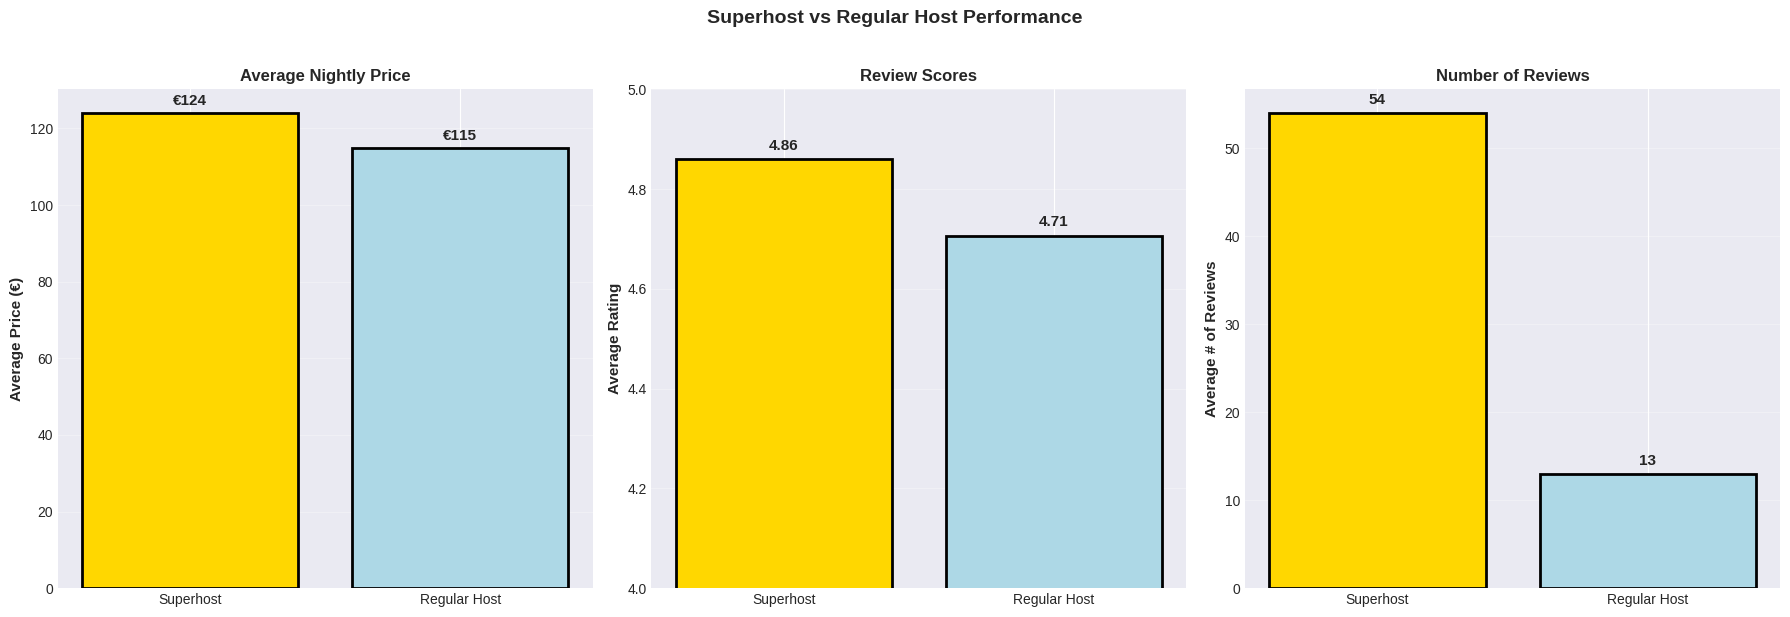

Superhost comparison chart created


In [139]:
#superhost vs regular comparison
if 'is_superhost' in listings.columns:

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    #price comparison
    comparison_data = [superhost_avg, regular_avg]
    labels = ['Superhost', 'Regular Host']
    colors_chart = ['gold', 'lightblue']

    axes[0].bar(labels, comparison_data, color=colors_chart, edgecolor='black', linewidth=2)
    axes[0].set_ylabel('Average Price (€)', fontsize=11, fontweight='bold')
    axes[0].set_title('Average Nightly Price', fontsize=12, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)

    for i, v in enumerate(comparison_data):
        axes[0].text(i, v + 2, f'€{v:.0f}', ha='center', fontweight='bold', fontsize=11)

    #review scores
    if 'review_scores_rating' in listings.columns:
        review_comparison = [superhost_rating, regular_rating]
        axes[1].bar(labels, review_comparison, color=colors_chart, edgecolor='black', linewidth=2)
        axes[1].set_ylabel('Average Rating', fontsize=11, fontweight='bold')
        axes[1].set_title('Review Scores', fontsize=12, fontweight='bold')
        axes[1].set_ylim([4.0, 5.0])
        axes[1].grid(axis='y', alpha=0.3)

        for i, v in enumerate(review_comparison):
            axes[1].text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold', fontsize=11)

    #number of reviews
    if 'number_of_reviews' in listings.columns:
        reviews_comparison = [superhost_reviews, regular_reviews]
        axes[2].bar(labels, reviews_comparison, color=colors_chart, edgecolor='black', linewidth=2)
        axes[2].set_ylabel('Average # of Reviews', fontsize=11, fontweight='bold')
        axes[2].set_title('Number of Reviews', fontsize=12, fontweight='bold')
        axes[2].grid(axis='y', alpha=0.3)

        for i, v in enumerate(reviews_comparison):
            axes[2].text(i, v + 1, f'{v:.0f}', ha='center', fontweight='bold', fontsize=11)

    fig.suptitle('Superhost vs Regular Host Performance', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    print("Superhost comparison chart created")

In [140]:
print("\n" + "=" * 70)
print("INVESTMENT INSIGHT: SHOULD YOU AIM FOR SUPERHOST STATUS?")
print("=" * 70)

if 'is_superhost' in listings.columns:

    #revenue impact
    superhost_annual = superhost_avg * 365 * 0.5
    regular_annual = regular_avg * 365 * 0.5
    revenue_difference = superhost_annual - regular_annual

    print(f"""
REVENUE COMPARISON (Assuming 50% Occupancy):

Superhost Property:  €{superhost_annual:,.0f}/year
Regular Property:    €{regular_annual:,.0f}/year
Difference:          €{revenue_difference:,.0f}/year ({price_premium:.0f}% more)

WHAT THIS MEANS:

Superhosts earn {price_premium:.0f}% MORE per night, which translates to
€{revenue_difference:,.0f} additional revenue per year.

SUPERHOST REQUIREMENTS (Airbnb):
Maintain 4.8+ star rating
<1% cancellation rate
90%+ response rate
10+ stays or 100+ nights per year

BENEFITS:
{price_premium:.0f}% pricing premium
Higher booking rates (better visibility)
Guest trust (badge effect)
Priority customer support

EFFORT REQUIRED:
Consistent 5-star service
Fast communication
Professional operations
Cannot afford poor reviews

RECOMMENDATION:
For serious investors, Superhost status is worth pursuing.
The €{revenue_difference:,.0f}/year premium justifies the extra effort
in maintaining high service standards.

For casual hosts or part-time investors, focus on competitive
pricing and good service rather than Superhost requirements.
""")


INVESTMENT INSIGHT: SHOULD YOU AIM FOR SUPERHOST STATUS?

REVENUE COMPARISON (Assuming 50% Occupancy):

Superhost Property:  €22,631/year
Regular Property:    €20,979/year
Difference:          €1,652/year (8% more)

WHAT THIS MEANS:

Superhosts earn 8% MORE per night, which translates to
€1,652 additional revenue per year.

SUPERHOST REQUIREMENTS (Airbnb):
Maintain 4.8+ star rating
<1% cancellation rate
90%+ response rate
10+ stays or 100+ nights per year

BENEFITS:
8% pricing premium
Higher booking rates (better visibility)
Guest trust (badge effect)
Priority customer support

EFFORT REQUIRED:
Consistent 5-star service
Fast communication
Professional operations
Cannot afford poor reviews

RECOMMENDATION:
For serious investors, Superhost status is worth pursuing.
The €1,652/year premium justifies the extra effort
in maintaining high service standards.

For casual hosts or part-time investors, focus on competitive
pricing and good service rather than Superhost requirements.



In [141]:
print("=" * 70)
print("MARKET TRENDS & PATTERNS (From Current Data)")
print("=" * 70)

print("""
PRICING TRENDS OBSERVED:

LOCATION PREMIUM:
Beach towns: 30% higher than city (Carini €127 vs Palermo €97)
Coastal > Inland pricing pattern
Distance from tourist attractions matters

PROPERTY TYPE EVOLUTION:
Entire homes dominate (75% of market)
Rental units most common (vs traditional homes)
Shift toward apartment-style properties

MARKET MATURITY:
Palermo: Saturated (7,330 listings)
Suburban areas: Growing markets (300-400 listings)
Small towns: Emerging/niche markets

IMPLICATIONS FOR INVESTORS:
Market is maturing toward professionalization
Location differentiation critical for premium pricing
Superhost status increasingly valuable
Competition highest in established markets
""")

MARKET TRENDS & PATTERNS (From Current Data)

PRICING TRENDS OBSERVED:

LOCATION PREMIUM:
Beach towns: 30% higher than city (Carini €127 vs Palermo €97)
Coastal > Inland pricing pattern
Distance from tourist attractions matters

PROPERTY TYPE EVOLUTION:
Entire homes dominate (75% of market)
Rental units most common (vs traditional homes)
Shift toward apartment-style properties

MARKET MATURITY:
Palermo: Saturated (7,330 listings)
Suburban areas: Growing markets (300-400 listings)
Small towns: Emerging/niche markets

IMPLICATIONS FOR INVESTORS:
Market is maturing toward professionalization
Location differentiation critical for premium pricing
Superhost status increasingly valuable
Competition highest in established markets



In [142]:
print("=" * 70)
print("MARKET GROWTH INDICATORS")
print("=" * 70)

#number of reviews as growth proxy
listings['has_recent_reviews'] = listings['number_of_reviews'] > 0

active_listings = len(listings[listings['has_recent_reviews']])
inactive_listings = len(listings[~listings['has_recent_reviews']])

print(f"""
MARKET ACTIVITY INDICATORS:

Active Listings (with reviews): {active_listings:,} ({active_listings/len(listings)*100:.1f}%)
New/Inactive Listings: {inactive_listings:,} ({inactive_listings/len(listings)*100:.1f}%)

Average reviews per listing: {listings['number_of_reviews'].mean():.1f}

High review counts suggest:
Mature, active market
Established booking patterns
Competitive environment

Low review counts suggest:
New market entrants
Recent listings
Opportunity or risk depending on interpretation
""")

MARKET GROWTH INDICATORS

MARKET ACTIVITY INDICATORS:

Active Listings (with reviews): 37,371 (74.2%)
New/Inactive Listings: 13,023 (25.8%)

Average reviews per listing: 23.1

High review counts suggest:
Mature, active market
Established booking patterns
Competitive environment

Low review counts suggest:
New market entrants
Recent listings
Opportunity or risk depending on interpretation



In [143]:
print("=" * 70)
print("ANALYSIS SCOPE & LIMITATIONS")
print("=" * 70)

print("""
WHAT THIS ANALYSIS COVERS:
Cross-sectional pricing analysis (current market snapshot)
Competitive positioning across locations
Property type and host performance
Investment opportunity identification

LIMITATIONS:
Seasonality: Requires time-series data
Unable to analyze monthly pricing patterns
Cannot identify peak/low seasons definitively
Inferred from minimum nights requirements

Growth Trends: Requires historical data
Snapshot data shows current state only
Cannot calculate year-over-year growth
Market direction inferred from activity indicators

FUTURE ENHANCEMENTS:
Incorporate calendar data for seasonal analysis
Track listings over time for growth trends
Analyze occupancy rates and booking patterns
Competitive dynamic pricing recommendations
""")

ANALYSIS SCOPE & LIMITATIONS

WHAT THIS ANALYSIS COVERS:
Cross-sectional pricing analysis (current market snapshot)
Competitive positioning across locations
Property type and host performance
Investment opportunity identification

LIMITATIONS:
Seasonality: Requires time-series data 
Unable to analyze monthly pricing patterns
Cannot identify peak/low seasons definitively
Inferred from minimum nights requirements

Growth Trends: Requires historical data
Snapshot data shows current state only
Cannot calculate year-over-year growth
Market direction inferred from activity indicators

FUTURE ENHANCEMENTS:
Incorporate calendar data for seasonal analysis
Track listings over time for growth trends
Analyze occupancy rates and booking patterns
Competitive dynamic pricing recommendations

